# Proyek Akhir: Menyelesaikan Permasalahan HR

- Email: nsalshabila115@gmail.com
- Id Dicoding:nbilasals

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

#MODEL SELECTION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#FEATURE IMPORTANCE
from sklearn.inspection import permutation_importance

### Menyiapkan data yang akan diguankan

In [2]:
#Read Dataset
df = pd.read_csv("/content/employee_data.csv")
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [3]:
#Get to see missing values, unique valuse and data type of each columns
col_summary = pd.DataFrame(df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in df.columns:
    na_list.append(df[col].isna().sum())
    unique_list.append(df[col].nunique())
    dtype_list.append(df[col].dtype)

col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,EmployeeId,0,1470,int64
1,Age,0,43,int64
2,Attrition,412,2,float64
3,BusinessTravel,0,3,object
4,DailyRate,0,886,int64
5,Department,0,3,object
6,DistanceFromHome,0,29,int64
7,Education,0,5,int64
8,EducationField,0,6,object
9,EmployeeCount,0,1,int64


In [4]:
df.shape

(1470, 35)

In [5]:
#Numeric Values
df.select_dtypes('int64' ,'float64').columns

Index(['EmployeeId', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
#Categorical Values
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [7]:
#Statistical value of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


Attrition
0.0    879
1.0    179
Name: count, dtype: int64


<ipython-input-8-587acab10c35>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition',data=df, palette='winter_r')


Text(0.5, 1.0, 'Attrition')

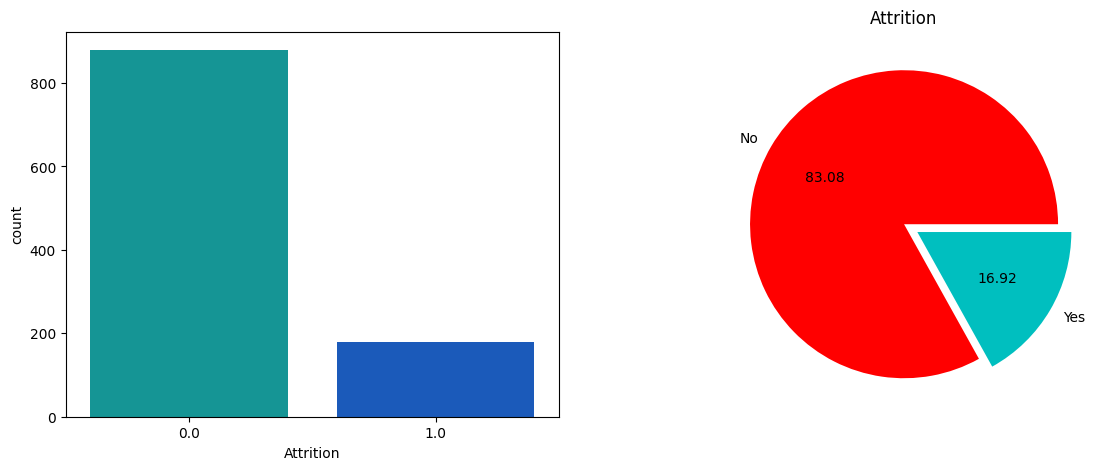

In [8]:
#Distribution of target variable
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df, palette='winter_r')
plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts() ,colors =['r' ,'c'] ,explode =[0,0.1]  ,autopct = '%.2f' ,labels =['No' ,'Yes'])
plt.title('Attrition')

<ipython-input-11-6cda06f5c739>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender' ,data = df, palette='winter_r') # Changed 'Gender' to x='Gender'


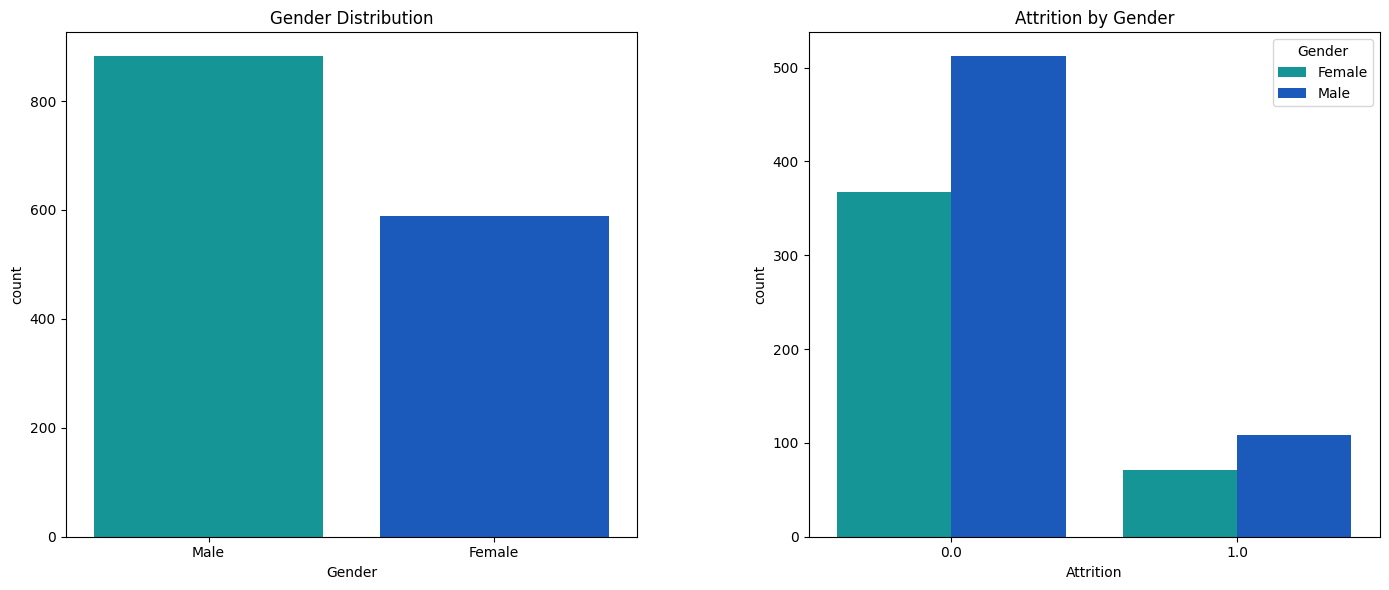

In [11]:
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)

#Gender Distribution
sns.countplot(x='Gender' ,data = df, palette='winter_r') # Changed 'Gender' to x='Gender'
plt.title('Gender Distribution')
plt.tight_layout()

plt.subplot(1,2,2)

#Attrition by Gender
# The original code was missing the data parameter for the x value
sns.countplot(x='Attrition' ,hue ='Gender', data=df, palette='winter_r')
plt.title('Attrition by Gender')

plt.subplots_adjust(wspace=0.3)

## Data Preparation / Preprocessing

In [14]:
# Dropping columns with little to no useful information
df = df.drop(['EmployeeCount',
                 'EmployeeId',
                 'Over18',
                  'StandardHours'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [15]:
#Binary Features Encoding

y_n_type = []
others =[]
for col in df.select_dtypes('object').columns:
    if(len(df[col].unique()) ==2):
        y_n_type.append(col)

y_n_type

['Gender', 'OverTime']

In [17]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [18]:
#categorical features encoding

others = df.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [19]:
le = LabelEncoder()
for col in others:
    df[col] = le.fit_transform(df[col])

In [20]:
# Checking for missing data
df.isnull().sum()

,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [21]:
# handling missing values in Attrition

df.dropna(subset=['Attrition'], inplace=True)

In [22]:
#SPLITTING DATASET INTO FEATURES -> X AND TARGET -> Y

X = df.drop('Attrition' ,axis =1)
y = df['Attrition']

print(X.shape ,y.shape)

(1058, 30) (1058,)


In [23]:
# Rescaling Data
Scaler = StandardScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X[Scaling_Cols] = Scaler.fit_transform(X[Scaling_Cols])

In [24]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,-0.005929,2,0.811829,1,0.251560,2,3,1,0,-0.228580,...,3,1,0,0.444831,-0.590885,1,-0.968534,-1.178416,-0.674714,-1.151606
2,1.482487,2,1.257596,1,-0.619433,4,1,1,1,-1.557631,...,3,3,3,0.819240,-0.590885,4,0.468645,-1.178416,-0.062232,0.794274
3,0.525648,1,-0.623443,2,2.117973,3,2,3,0,0.559005,...,3,4,1,1.443254,-0.590885,4,2.065512,-0.072148,0.550249,1.072257
6,0.313018,2,0.770191,2,-0.992715,2,3,2,1,-0.425477,...,4,3,3,-0.678394,-0.590885,2,-0.489474,-0.348715,-0.674714,-0.595640
7,1.907749,2,-0.207067,1,-0.868288,3,3,4,1,0.608229,...,3,4,1,1.568057,-0.590885,3,-0.329788,-0.625282,-0.368473,-0.039674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,-0.962768,0,1.362914,1,1.869118,2,5,2,1,0.312885,...,3,1,0,-0.179183,-0.590885,2,0.468645,0.757553,-0.368473,1.350240
1465,0.100387,2,-1.571311,1,-0.992715,3,1,3,0,0.755902,...,3,4,0,-0.179183,0.945126,4,-0.968534,-1.178416,-0.674714,-1.151606
1467,-0.962768,2,1.654378,1,0.375988,1,1,3,0,0.657453,...,3,4,0,-1.302408,0.945126,2,-0.968534,-0.901849,-0.674714,-1.151606
1468,0.313018,0,-0.861022,1,0.873698,2,1,3,1,0.411333,...,3,2,1,-0.678394,-2.126897,3,-0.489474,-0.625282,-0.674714,-1.151606


Handling Imbalance

In [26]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [27]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1230
X test size:  528
y train size:  1230
y test size:  528


Attrition
0.0    879
1.0    179
Name: count, dtype: int64


<Axes: xlabel='Attrition', ylabel='count'>

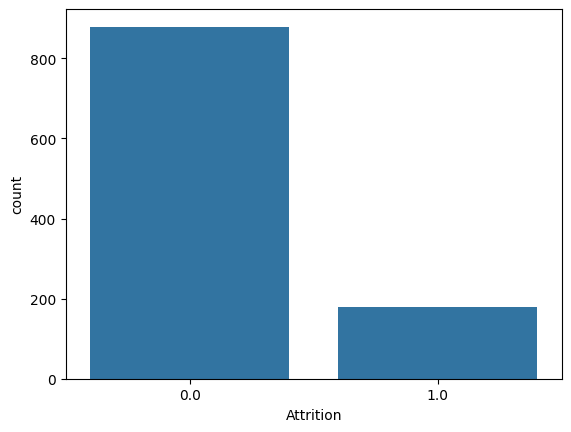

In [29]:
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df)

## Modeling

XGBoost

In [33]:
grid3 = {'n_estimators': [100,150,200,250,300,350,400,450,500],
              'learning_rate': [0.01, 0.5,0.2, 1.0],
              'subsample': [0.3,0.5, 0.6,0.8,1.0],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.2,0.5, 0.4,0.8,1.0],
              'min_child_weight': [1, 2, 3, 4]}
xgb = RandomizedSearchCV(XGBClassifier(),
                             param_distributions = grid3,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
xgb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.2, 0.5, 0.4, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.5, 0.2, 1.0],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500],
                                        'subsample': [0.3, 0.5, 0.6, 0.8, 1.0]},
                   scoring='recall', verbose=1)

In [34]:
xgb.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 7,
 'learning_rate': 0.2,
 'colsample_bytree': 1.0}

## Evaluation

Accuracy: 89.58%
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       267
         1.0       0.89      0.90      0.90       261

    accuracy                           0.90       528
   macro avg       0.90      0.90      0.90       528
weighted avg       0.90      0.90      0.90       528



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

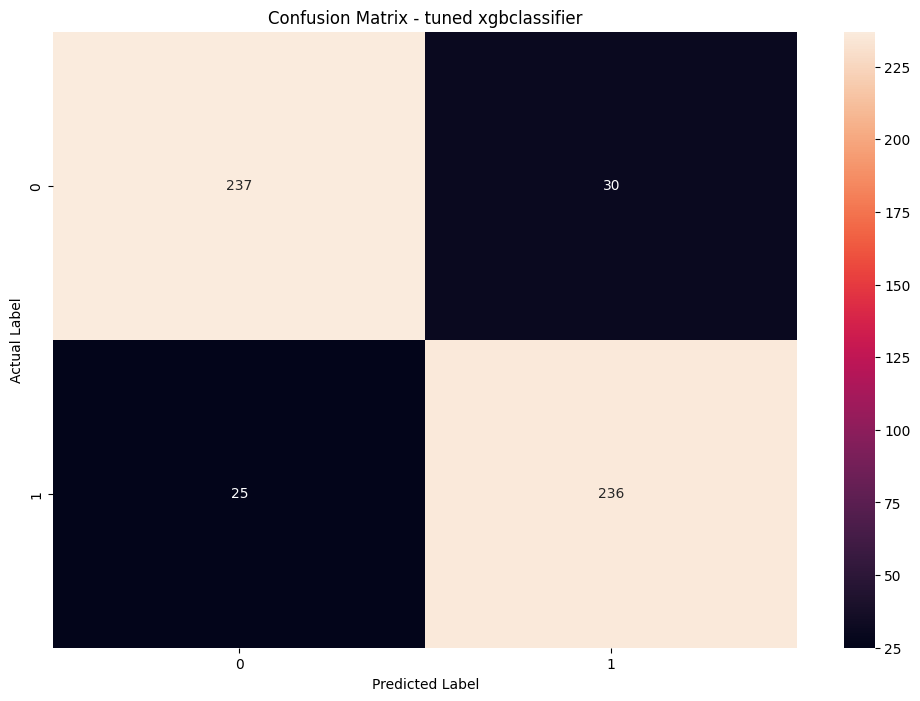

In [35]:
tuned_xgb = XGBClassifier(**xgb.best_params_)
tuned_xgb.fit(X_train,y_train)
y_pred = tuned_xgb.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print(classification_report(y_test, y_pred))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned xgbclassifier')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Save Model

In [36]:
import joblib

# Simpan model
joblib.dump(tuned_xgb, 'xgb_model.pkl')


['xgb_model.pkl']